In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
path = f"gdrive/MyDrive/Mestrado/IA904/Weeds/"

Mounted at /content/gdrive


In [2]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np

In [3]:
def show_images(folder_path, qtd=10):
    image_files = os.listdir(os.path.join(folder_path, 'images'))
    plt.figure(figsize=(20, 10))

    for i in range(qtd):
        image_path = os.path.join(folder_path, 'images', image_files[i])
        image = Image.open(image_path)
        plt.subplot(1, qtd, i + 1)
        plt.imshow(image)
        plt.axis('off')

    plt.show()

In [4]:
def count_lines_in_file(file_path):
    with open(file_path, 'r') as file:
        return len(file.readlines())

In [5]:
def get_label_files_statistics(folder_path):
    labels_dir = os.path.join(folder_path, 'labels')
    line_counts = []

    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            file_path = os.path.join(labels_dir, label_file)
            line_count = count_lines_in_file(file_path)
            line_counts.append(line_count)

    line_count_stats = Counter(line_counts)

    total_files = len(line_counts)
    total_lines = sum(line_counts)
    average_lines_per_file = total_lines / total_files if total_files > 0 else 0
    min_lines_in_file = min(line_counts) if total_files > 0 else 0
    max_lines_in_file = max(line_counts) if total_files > 0 else 0

    for line_count, occurrence in sorted(line_count_stats.items()):
        print(f"  {line_count} lines: {occurrence} files")

    print(f"\n  Total files: {total_files}")
    print(f"  Total lines: {total_lines}")
    print(f"  Average lines per file: {average_lines_per_file:.2f}")
    print(f"  Min lines in a file: {min_lines_in_file}")
    print(f"  Max lines in a file: {max_lines_in_file}")

In [17]:
def get_image_statistics(folder_path):
    images_dir = os.path.join(folder_path, 'images')
    widths, heights = [], []
    n_grayscale, n_color, sampled_pixels = 0, 0, []

    for image_file in os.listdir(images_dir):

        image_path = os.path.join(images_dir, image_file)
        image = Image.open(image_path)
        image_array = np.array(image)

        if len(image_array.shape) == 2:
            n_grayscale += 1
            sampled_pixels.extend(image_array.ravel()[::100])
        else:
            n_color += 1
            for channel in range(3):
                sampled_pixels.extend(image_array[:, :, channel].ravel()[::100])

        widths.append(image.width)
        heights.append(image.height)

    mean_width, std_width = np.mean(widths), np.std(widths)
    mean_height, std_height = np.mean(heights), np.std(heights)

    print(f"\nGeneral statistics for {os.path.basename(folder_path)}:")
    print(f"  Mean image width: {mean_width:.2f} - Std: {std_width:.2f}")
    print(f"  Mean image height: {mean_height:.2f} - Std: {std_height:.2f}")
    print(f"  Number of grayscale images: {n_grayscale}")
    print(f"  Number of color images: {n_color}")

    hist, bins = np.histogram(sampled_pixels, bins=256, range=(0, 255))
    hist = hist / hist.sum() * 100

    plt.figure(figsize=(10, 4))
    plt.hist(bins[:-1], bins, weights=hist, histtype='step', color='black')
    plt.title(f"Combined Histogram for {os.path.basename(folder_path)}")
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency (%)')
    plt.show()

Test


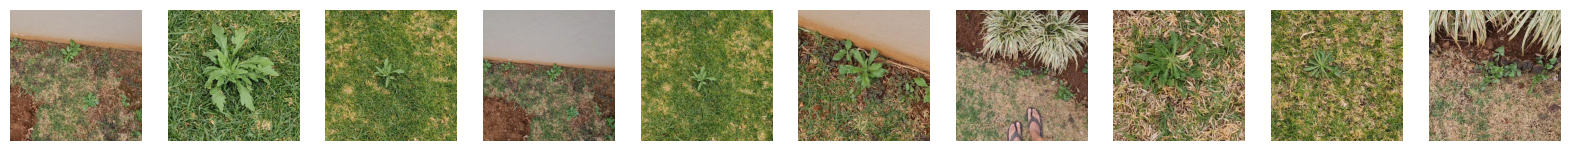



  1 lines: 83 files
  2 lines: 36 files
  3 lines: 18 files
  4 lines: 19 files
  5 lines: 5 files
  6 lines: 3 files
  7 lines: 3 files
  8 lines: 4 files
  9 lines: 2 files
  10 lines: 1 files
  11 lines: 2 files
  12 lines: 1 files
  13 lines: 3 files

  Total files: 180
  Total lines: 482
  Average lines per file: 2.68
  Min lines in a file: 1
  Max lines in a file: 13


In [ ]:
print("Test")
show_images(os.path.join(path, 'test'))
print("\n")
get_label_files_statistics(os.path.join(path, 'test'))



General statistics for test:
  Mean image width: 416.00 - Std: 0.00
  Mean image height: 416.00 - Std: 0.00
  Number of grayscale images: 0
  Number of color images: 180


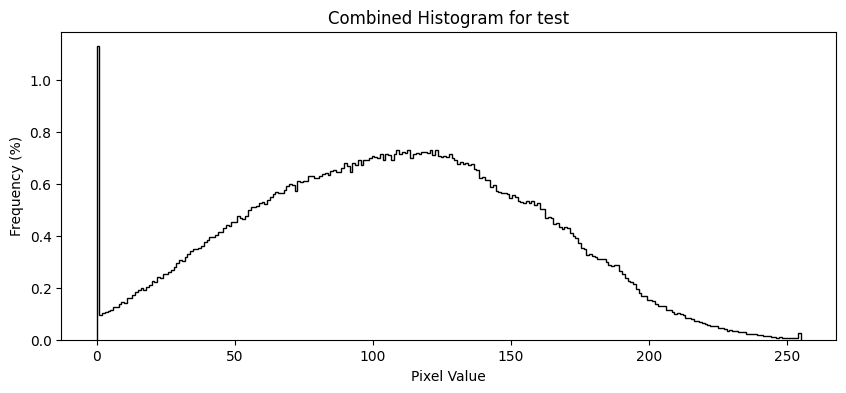

In [18]:
get_image_statistics(os.path.join(path, 'test'))

Train


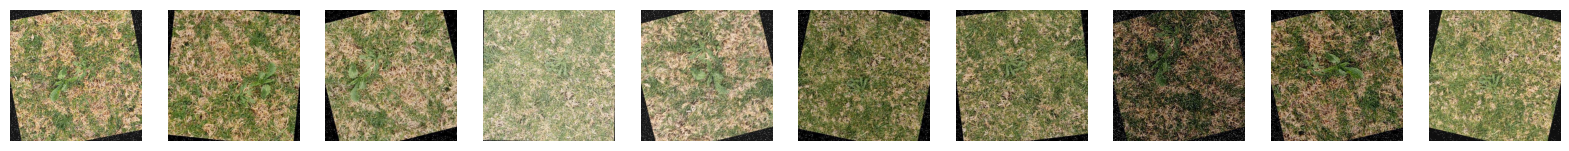



  1 lines: 1831 files
  2 lines: 686 files
  3 lines: 290 files
  4 lines: 215 files
  5 lines: 161 files
  6 lines: 105 files
  7 lines: 76 files
  8 lines: 96 files
  9 lines: 44 files
  10 lines: 52 files
  11 lines: 21 files
  12 lines: 24 files
  13 lines: 22 files
  14 lines: 25 files
  15 lines: 12 files
  16 lines: 4 files

  Total files: 3664
  Total lines: 9983
  Average lines per file: 2.72
  Min lines in a file: 1
  Max lines in a file: 16


In [ ]:
print("Train")
show_images(os.path.join(path, 'train'))
print("\n")
get_label_files_statistics(os.path.join(path, 'train'))


General statistics for train:
  Mean image width: 416.00 - Std: 0.00
  Mean image height: 416.00 - Std: 0.00
  Number of grayscale images: 0
  Number of color images: 3664


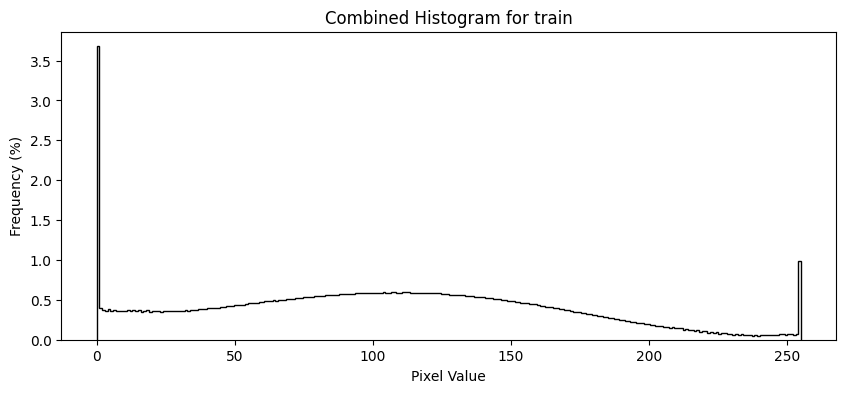

In [19]:
get_image_statistics(os.path.join(path, 'train'))

Valid


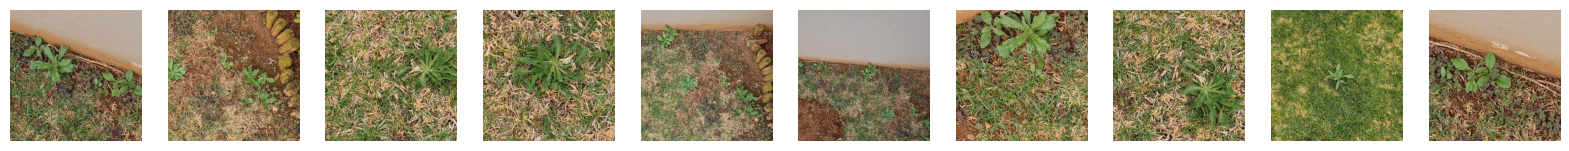



  1 lines: 168 files
  2 lines: 78 files
  3 lines: 32 files
  4 lines: 26 files
  5 lines: 22 files
  6 lines: 8 files
  7 lines: 6 files
  8 lines: 6 files
  9 lines: 3 files
  10 lines: 1 files
  11 lines: 4 files
  12 lines: 2 files
  13 lines: 1 files
  14 lines: 1 files
  16 lines: 1 files

  Total files: 359
  Total lines: 920
  Average lines per file: 2.56
  Min lines in a file: 1
  Max lines in a file: 16


In [ ]:
print("Valid")
show_images(os.path.join(path, 'valid'))
print("\n")
get_label_files_statistics(os.path.join(path, 'valid'))


General statistics for valid:
  Mean image width: 416.00 - Std: 0.00
  Mean image height: 416.00 - Std: 0.00
  Number of grayscale images: 0
  Number of color images: 359


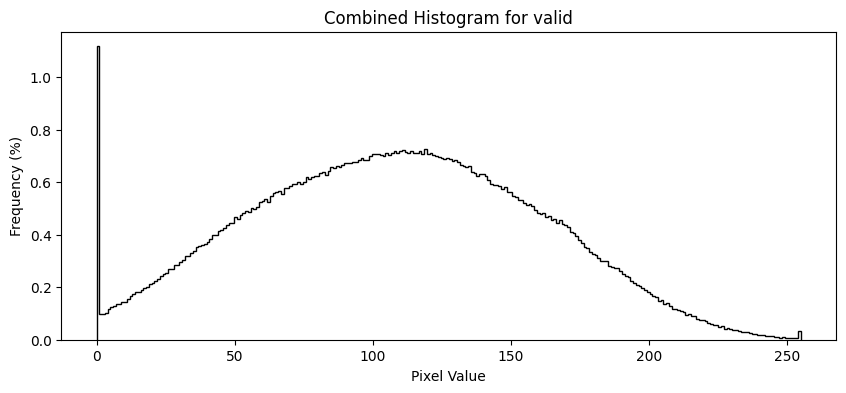

In [20]:
get_image_statistics(os.path.join(path, 'valid'))